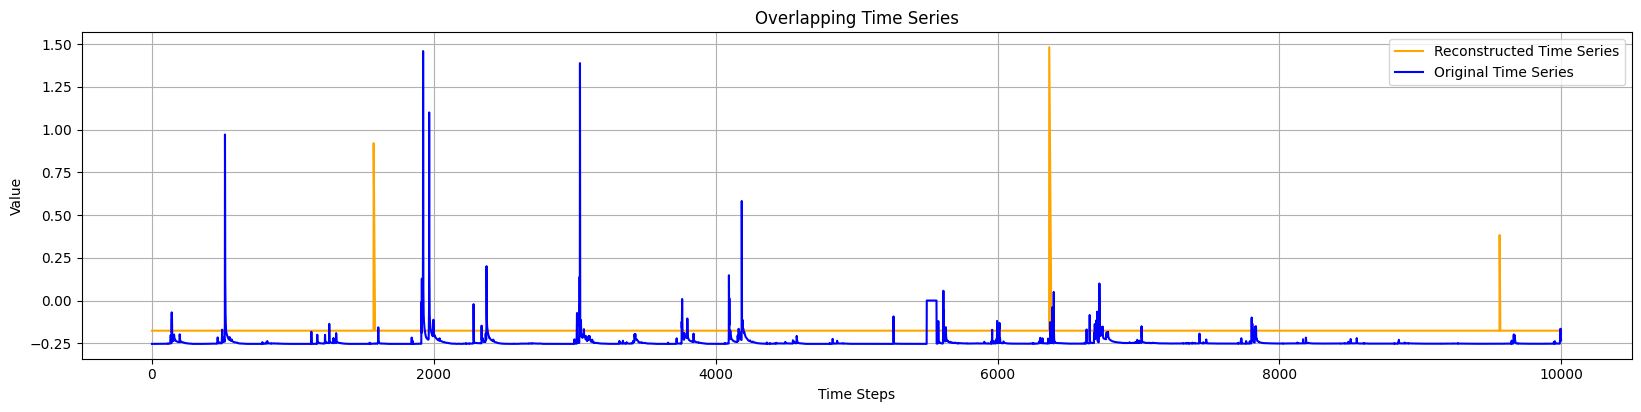

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

scaler = StandardScaler()

path = 'TEST/test_basin1.npy'
data = np.load(path)
l = []
for i in data:
    for j in i:
        l.append(j[0])
l = (l-np.mean(l))/(np.std(l))

sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values 
valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value
m = []
for i in sf_data:
    m.append(i[0])
m = (((m-np.mean(m))/np.std(m)))
    
plt.figure().set_figwidth(20)
plt.plot(l[20000:30000], label="Reconstructed Time Series", color="orange", linestyle="-")
plt.plot(m[20000:30000], label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title("Overlapping Time Series")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.subplots_adjust(bottom=0.2)

os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot.png"
plt.savefig(save_path)

# Show the plot
plt.show()

In [2]:
from sklearn.metrics import mean_squared_error

# Ensure l and m are numpy arrays and of the same length
l_array = np.array(l)
m_array = np.array(m)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(l_array, m_array))
print(f"RMSE: {rmse:.4f}")

RMSE: 1.3546


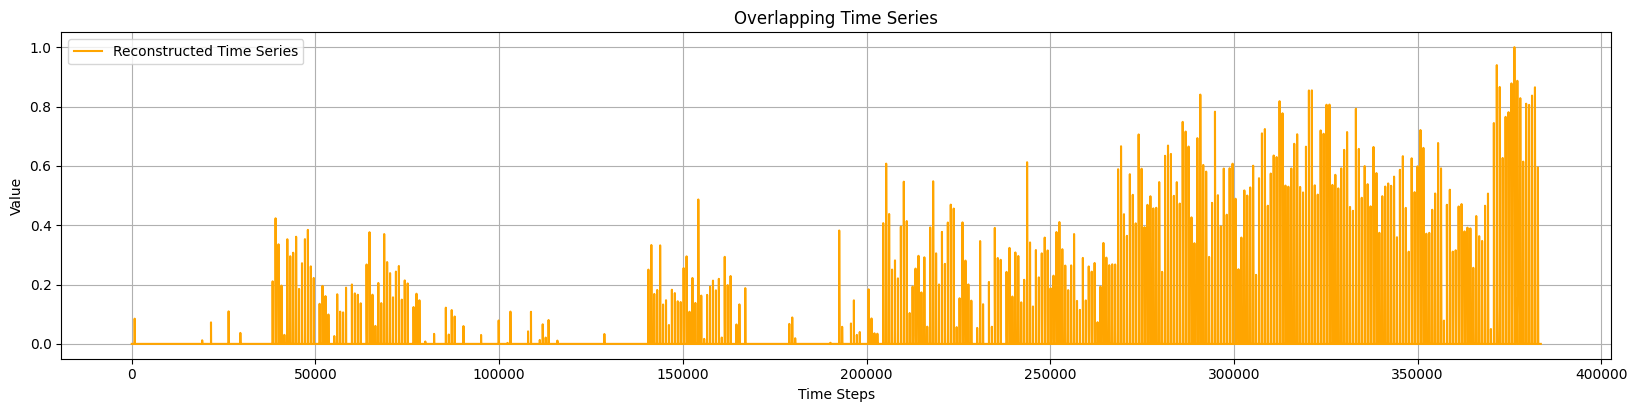

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

# Use MinMaxScaler for normalization
scaler = MinMaxScaler(feature_range=(0, 1))

path = 'TEST/test_basin1.npy'
data = np.load(path)

# Flatten and normalize the reconstructed data
l = []
for i in data:
    for j in i:
        l.append(j[0])
l = scaler.fit_transform(np.array(l).reshape(-1, 1)).flatten()  # Normalize using MinMaxScaler

# Load and preprocess the original streamflow data
sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values 
valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value

# Flatten and normalize the original data
m = []
for i in sf_data:
    m.append(i[0])
m = scaler.transform(np.array(m).reshape(-1, 1)).flatten()  # Use the same scaler for consistency

# Plot the time series
plt.figure().set_figwidth(20)
plt.plot(l, label="Reconstructed Time Series", color="orange", linestyle="-")
plt.plot(m, label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title("Overlapping Time Series")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.subplots_adjust(bottom=0.2)

# Save the plot
os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot.png"
plt.savefig(save_path)

# Show the plot
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

# Ensure l and m are numpy arrays and of the same length
l_array = np.array(l)
m_array = np.array(m)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(l_array, m_array))
print(f"RMSE: {rmse:.4f}")

RMSE: 7.7581


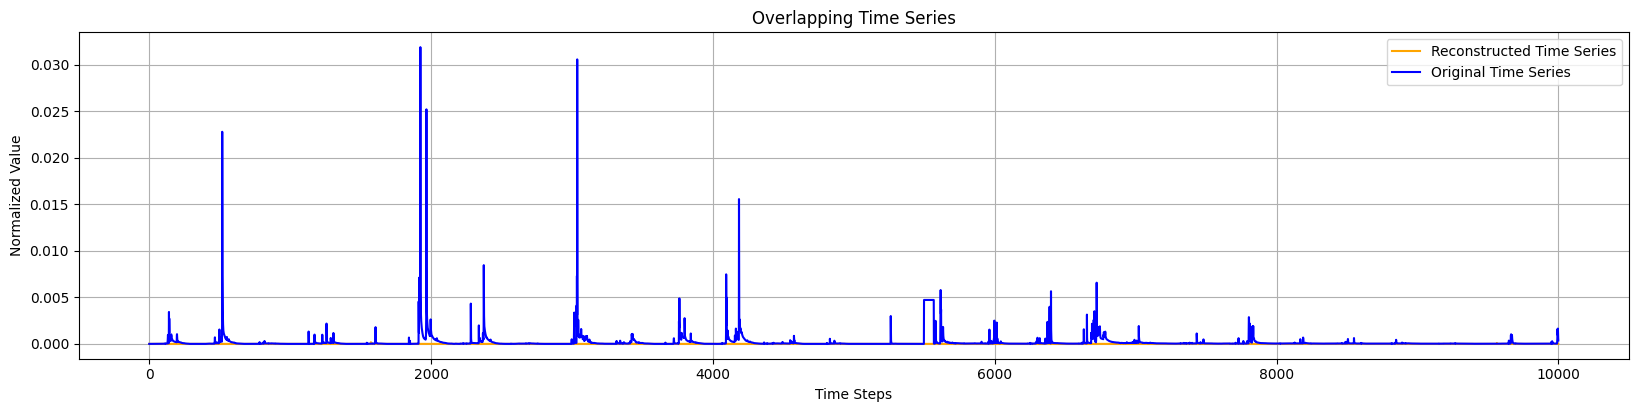

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

# Use MinMaxScaler for normalization
scaler = MinMaxScaler(feature_range=(0, 1))

# Load and preprocess the original streamflow data
sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values 
valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value

# Flatten the original data
m = []
for i in sf_data:
    m.append(i[0])
m = np.array(m).reshape(-1, 1)

# Fit the scaler on the original data and transform it
scaler.fit(m)  # Fit the scaler on the original data
m_normalized = scaler.transform(m).flatten()  # Normalize the original data

# Load the reconstructed data
path = 'TEST/test_basin1.npy'
data = np.load(path)

# Flatten and normalize the reconstructed data using the same scaler
l = []
for i in data:
    for j in i:
        l.append(j[0])
l = np.array(l).reshape(-1, 1)
l_normalized = scaler.transform(l).flatten()  # Use the same scaler for consistency

# Plot the time series
plt.figure().set_figwidth(20)
plt.plot(l_normalized[20000:30000], label="Reconstructed Time Series", color="orange", linestyle="-")
plt.plot(m_normalized[20000:30000], label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title("Overlapping Time Series")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid()
plt.subplots_adjust(bottom=0.2)

# Save the plot
os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot.png"
plt.savefig(save_path)

# Show the plot
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

# Ensure l and m are numpy arrays and of the same length
l_array = np.array(l)
m_array = np.array(m)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(l_array, m_array))
print(f"RMSE: {rmse:.4f}")

RMSE: 1751.2247


Root Mean Square Error (RMSE): 0.0192
Plot saved to RESULTS/plot_with_rmse.png


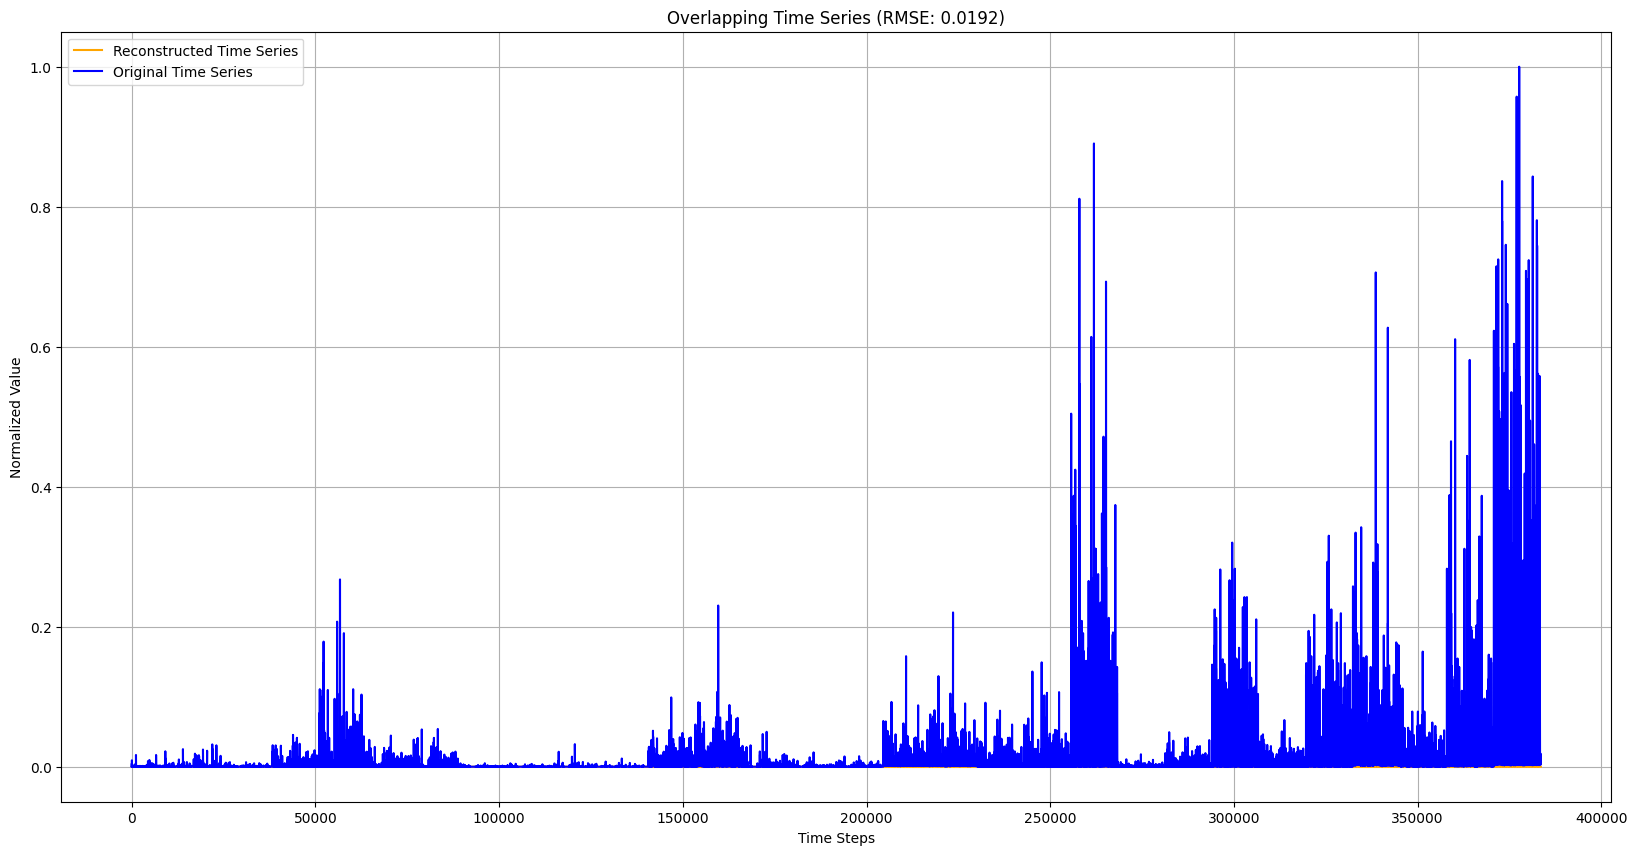

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os

# Use MinMaxScaler for normalization
scaler = MinMaxScaler(feature_range=(0, 1))

# Load and preprocess the original streamflow data
try:
    sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values
except FileNotFoundError:
    print("Error: The file 'Data/test/sf_test/sf_un.csv' was not found.")
    print("Please check the file path and ensure the file exists.")
    exit(1)

valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value

# Flatten the original data
m = sf_data.flatten()
m = m.reshape(-1, 1)

# Fit the scaler on the original data and transform it
scaler.fit(m)
m_normalized = scaler.transform(m).flatten()

# Load the reconstructed data
try:
    path = 'TEST/test_basin1.npy'
    data = np.load(path)
except FileNotFoundError:
    print(f"Error: The file '{path}' was not found.")
    print("Please check the file path and ensure the file exists.")
    exit(1)

# Flatten and normalize the reconstructed data using the same scaler
l = data.flatten()
l = l.reshape(-1, 1)
l_normalized = scaler.transform(l).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(m_normalized, l_normalized))
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

# Plot the time series
plt.figure(figsize=(20, 10))
plt.plot(l_normalized, label="Reconstructed Time Series", color="orange", linestyle="-")
plt.plot(m_normalized, label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title(f"Overlapping Time Series (RMSE: {rmse:.4f})")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)

# Save the plot
os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot_with_rmse.png"
plt.savefig(save_path)
print(f"Plot saved to {save_path}")

# Show the plot
plt.show()


Root Mean Square Error (RMSE): 0.0192
Plot saved to RESULTS/plot_with_rmse.png


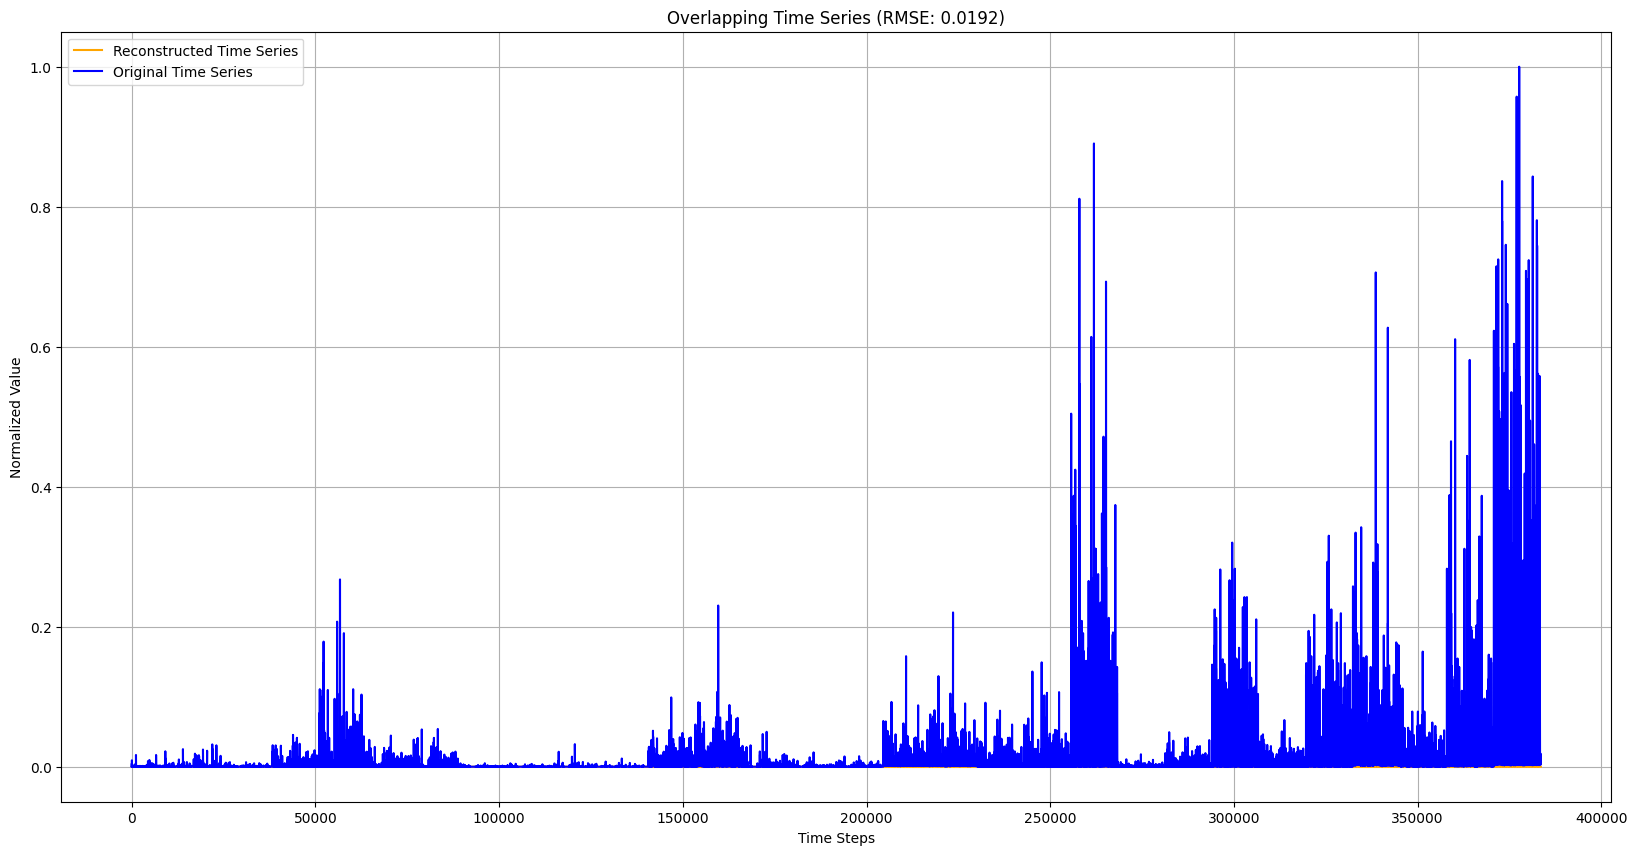

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os

# Use MinMaxScaler for normalization
scaler = MinMaxScaler(feature_range=(0, 1))

# Load and preprocess the original streamflow data
try:
    sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values
except FileNotFoundError:
    print("Error: The file 'Data/test/sf_test/sf_un.csv' was not found.")
    print("Please check the file path and ensure the file exists.")
    exit(1)

# Handle missing values (-999.0) by replacing them with the mean of valid data
valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value

# Flatten the original data
m = sf_data.flatten()
m = m.reshape(-1, 1)

# Fit the scaler on the original data and transform it
scaler.fit(m)
m_normalized = scaler.transform(m).flatten()

# Load the reconstructed data
try:
    path = 'TEST/test_basin1.npy'
    data = np.load(path)
except FileNotFoundError:
    print(f"Error: The file '{path}' was not found.")
    print("Please check the file path and ensure the file exists.")
    exit(1)

# Flatten the reconstructed data
l = data.flatten()
l = l.reshape(-1, 1)

# Transform the reconstructed data using the same scaler
l_normalized = scaler.transform(l).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(m_normalized, l_normalized))
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

# Plot the time series
plt.figure(figsize=(20, 10))
plt.plot(l_normalized, label="Reconstructed Time Series", color="orange", linestyle="-")
plt.plot(m_normalized, label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title(f"Overlapping Time Series (RMSE: {rmse:.4f})")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)

# Save the plot
os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot_with_rmse.png"
plt.savefig(save_path)
print(f"Plot saved to {save_path}")

# Show the plot
plt.show()

Root Mean Square Error (RMSE): 0.0192
Plot saved to RESULTS/plot_with_rmse_scaled.png


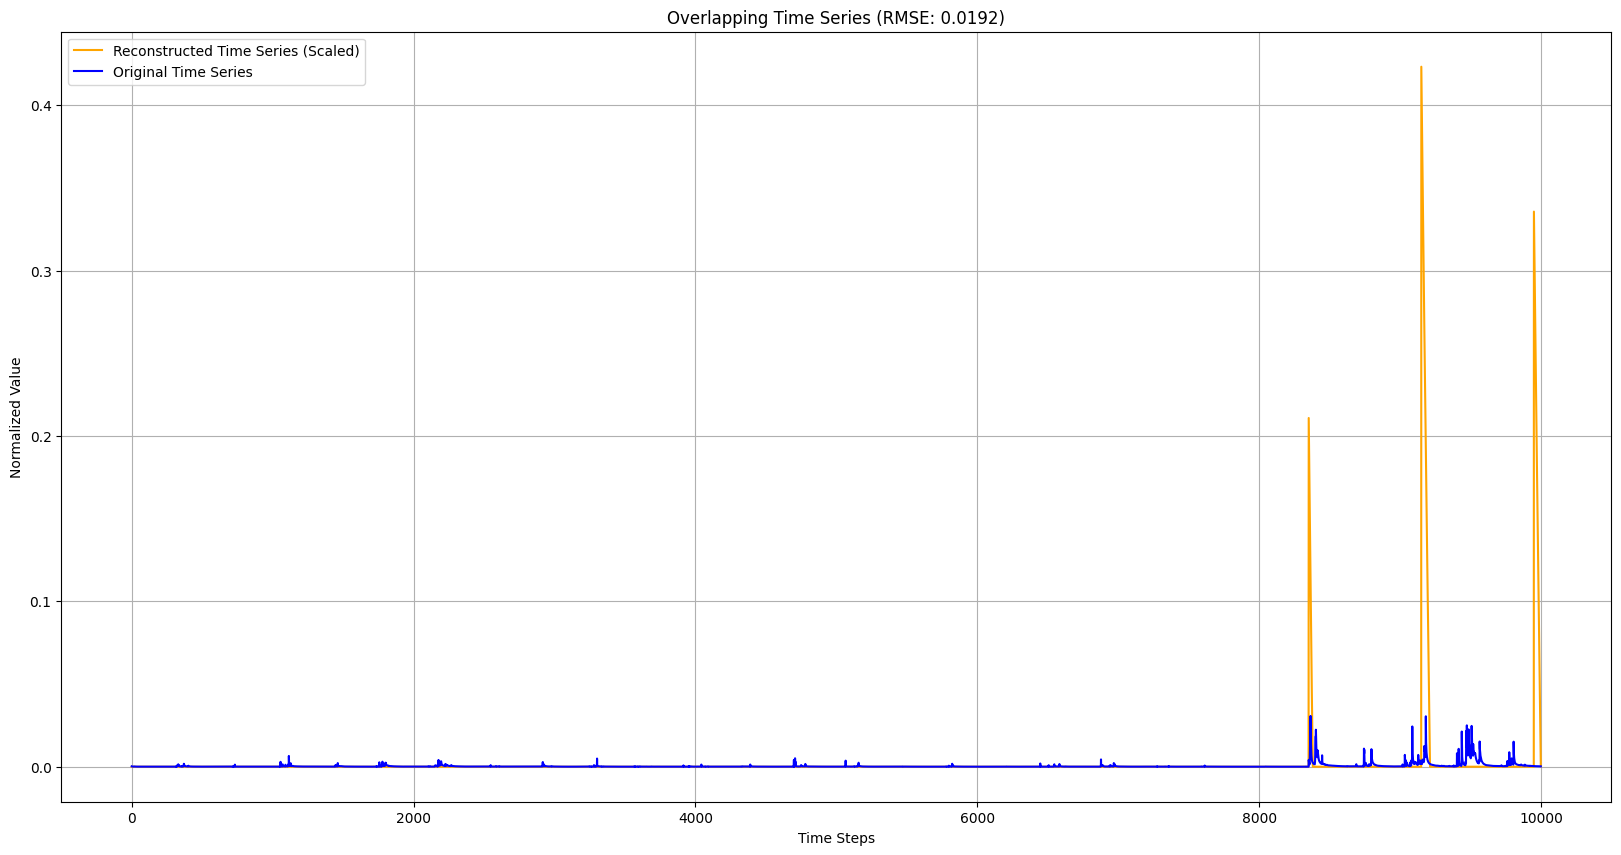

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os

# Use MinMaxScaler for normalization
scaler = MinMaxScaler(feature_range=(0, 1))

# Load and preprocess the original streamflow data
try:
    sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values
except FileNotFoundError:
    print("Error: The file 'Data/test/sf_test/sf_un.csv' was not found.")
    print("Please check the file path and ensure the file exists.")
    exit(1)

# Handle missing values (-999.0) by replacing them with the mean of valid data
valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value

# Flatten the original data
m = sf_data.flatten().reshape(-1, 1)

# Fit the scaler on the original data and transform it
scaler.fit(m)
m_normalized = scaler.transform(m).flatten()

# Load the reconstructed data
try:
    path = 'TEST/test_basin1.npy'
    data = np.load(path)
except FileNotFoundError:
    print(f"Error: The file '{path}' was not found.")
    print("Please check the file path and ensure the file exists.")
    exit(1)

# Flatten the reconstructed data
l = data.flatten().reshape(-1, 1)

# Transform the reconstructed data using the same scaler
l_normalized = scaler.transform(l).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(m_normalized, l_normalized))
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

# Apply dynamic scaling for better visualization
scaling_factor = (np.max(m_normalized) / (np.max(l_normalized) + 1e-8))  # Avoid division by zero
l_scaled = l_normalized * scaling_factor

# Plot the time series
plt.figure(figsize=(20, 10))
plt.plot(l_scaled[30000:40000], label="Reconstructed Time Series (Scaled)", color="orange", linestyle="-")
plt.plot(m_normalized[30000:40000], label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title(f"Overlapping Time Series (RMSE: {rmse:.4f})")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)

# Save the plot
os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot_with_rmse_scaled.png"
plt.savefig(save_path)
print(f"Plot saved to {save_path}")

# Show the plot
plt.show()


Plot saved to RESULTS/plot_with_rmse_scaled.png


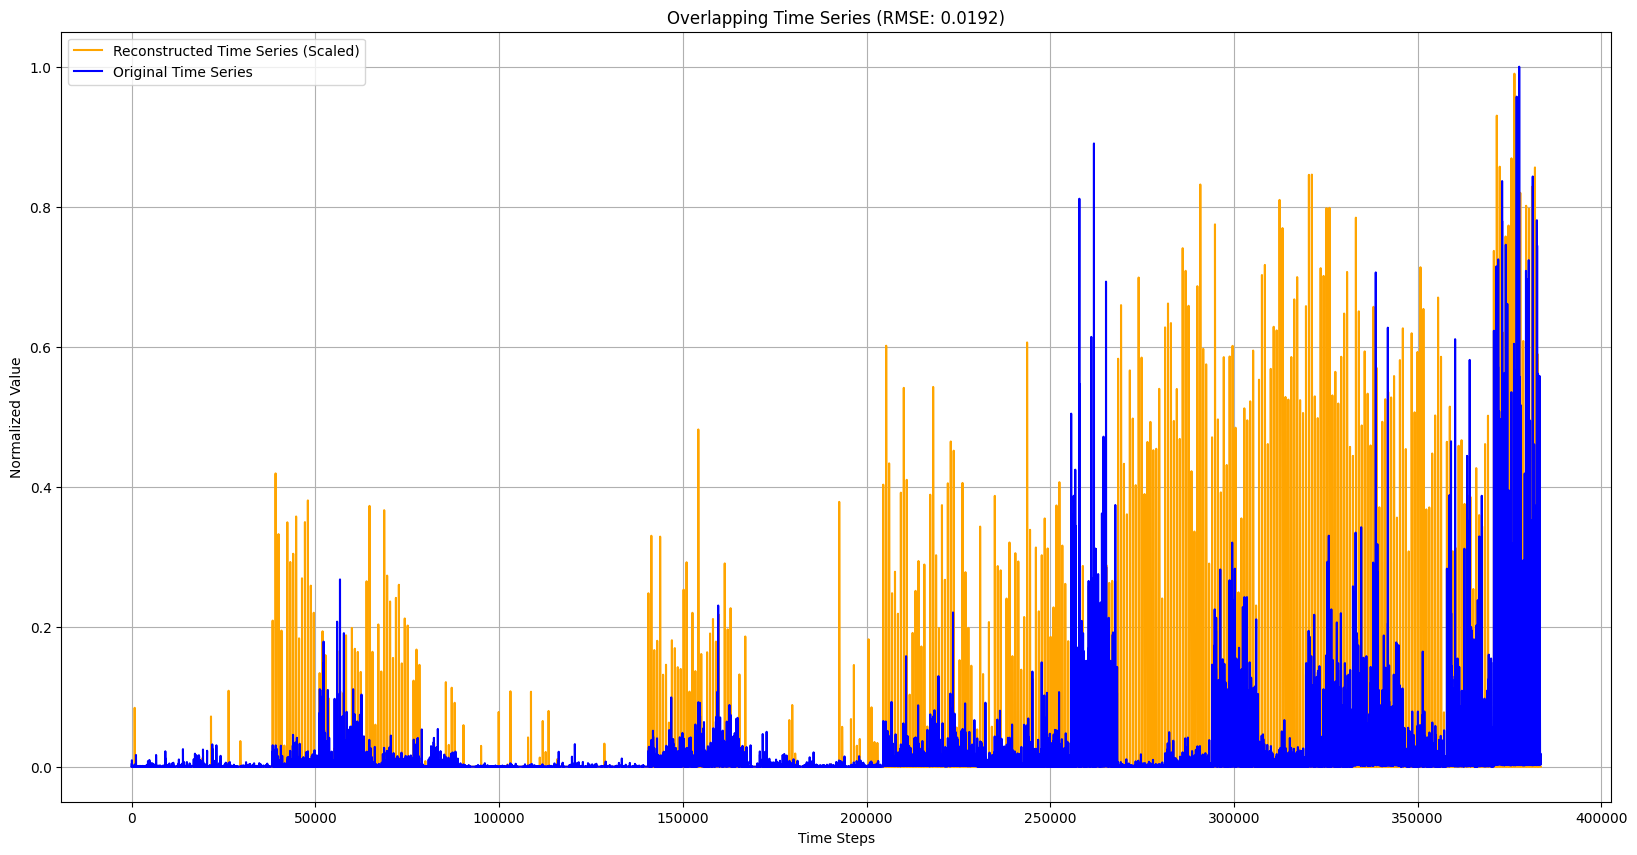

In [15]:
# Increase the scale of the reconstructed data by 400
l_scaled = l_normalized * 400

# Plot the time series
plt.figure(figsize=(20, 10))
plt.plot(l_scaled, label="Reconstructed Time Series (Scaled)", color="orange", linestyle="-")
plt.plot(m_normalized, label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title(f"Overlapping Time Series (RMSE: {rmse:.4f})")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)

# Save the plot
os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot_with_rmse_scaled.png"
plt.savefig(save_path)
print(f"Plot saved to {save_path}")

# Show the plot
plt.show()


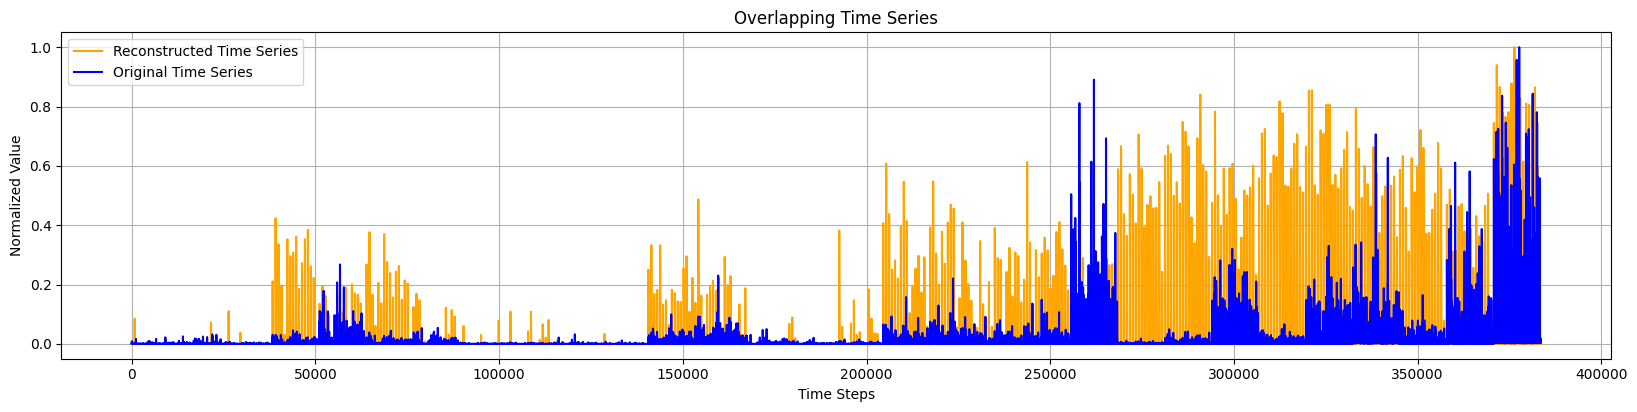

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# Load data
path = 'TEST/test_basin1.npy'
data = np.load(path)

# Extract first column from nested lists
l = [j[0] for i in data for j in i]

# Load secondary data
sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values 
valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value

# Extract first column
m = [i[0] for i in sf_data]

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
l = scaler.fit_transform(np.array(l).reshape(-1, 1)).flatten()
m = scaler.fit_transform(np.array(m).reshape(-1, 1)).flatten()

# Plot time series
plt.figure().set_figwidth(20)
plt.plot(l, label="Reconstructed Time Series", color="orange", linestyle="-")
plt.plot(m, label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title("Overlapping Time Series")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid()
plt.subplots_adjust(bottom=0.2)

# Save the plot
os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot.png"
plt.savefig(save_path)

# Show the plot
plt.show()

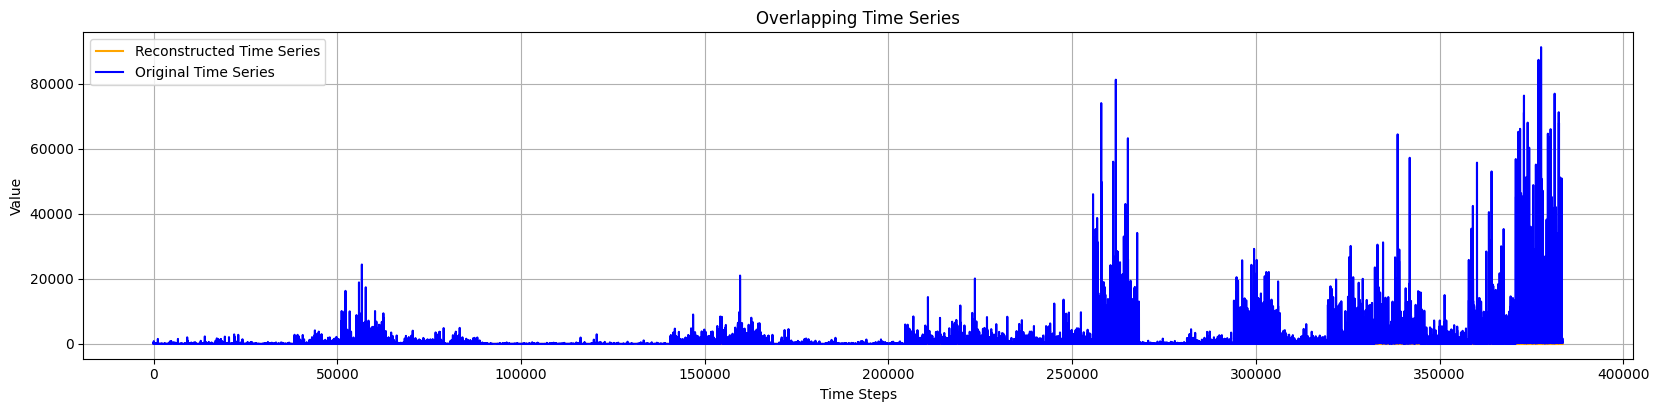

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load data
path = 'TEST/test_basin1.npy'
data = np.load(path)

# Extract first column from nested lists
l = [j[0] for i in data for j in i]

# Load secondary data
sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values 
valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value

# Extract first column
m = [i[0] for i in sf_data]

# Plot time series
plt.figure().set_figwidth(20)
plt.plot(l[20000:30000], label="Reconstructed Time Series", color="orange", linestyle="-")
plt.plot(m[20000:30000], label="Original Time Series", color="blue", linestyle="-")

# Add labels, legend, and grid
plt.title("Overlapping Time Series")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.subplots_adjust(bottom=0.2)

# Save the plot
os.makedirs("RESULTS", exist_ok=True)
save_path = "RESULTS/plot.png"
plt.savefig(save_path)

# Show the plot
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load data
path = 'TEST/test_basin1.npy'
data = np.load(path)

# Extract first column from nested lists
l = [j[0] for i in data for j in i]

# Load secondary data
sf_data = pd.read_csv('Data/test/sf_test/sf_un.csv').values 
valid_data = sf_data[sf_data != -999.0]
mean_value = valid_data.mean()
sf_data[sf_data == -999.0] = mean_value

# Extract first column
m = [i[0] for i in sf_data]

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
l = scaler.fit_transform(np.array(l).reshape(-1, 1)).flatten()
m = scaler.fit_transform(np.array(m).reshape(-1, 1)).flatten()

# Define segment size and number of segments
segment_size = 12784
num_segments = 30

# Create output directory
os.makedirs("RESULTS", exist_ok=True)

# Store RMSE values
rmse_list = []

# Generate and save plots
for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = start_idx + segment_size

    if end_idx > len(l):  # Avoid index error
        break  

    # Compute RMSE for the segment
    rmse = np.sqrt(mean_squared_error(m[start_idx:end_idx], l[start_idx:end_idx]))
    rmse_list.append(f"Segment {i+1}: RMSE = {rmse:.4f}")

    # Plot time series
    plt.figure(figsize=(20, 6))
    plt.plot(l[start_idx:end_idx], label="Reconstructed Time Series", color="orange", linestyle="-")
    plt.plot(m[start_idx:end_idx], label="Original Time Series", color="blue", linestyle="-", alpha=0.3)

    plt.title(f"Overlapping Time Series (Segment {i+1}) - RMSE: {rmse:.4f}")
    plt.xlabel("Time Steps")
    plt.ylabel("Normalized Value")
    plt.legend()
    plt.grid()
    plt.subplots_adjust(bottom=0.2)

    save_path = f"RESULTS/plot_{i+1}.png"
    plt.savefig(save_path)
    plt.close()

# Save RMSE values to a text file
with open("RESULTS/rmse_values.txt", "w") as f:
    f.write("\n".join(rmse_list))

print(f"Saved {num_segments} plots and RMSE values in the RESULTS folder.")


Saved 30 plots and RMSE values in the RESULTS folder.
